In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cold-users/logs_df_2024-08-05.parquet
/kaggle/input/cold-users/logs_df_2024-08-06.parquet
/kaggle/input/cold-users/���⠢ �����.docx
/kaggle/input/cold-users/video_stat.parquet


В этом файлике мы исследуем распределения

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
logs1 = pd.read_parquet('../input/cold-users/logs_df_2024-08-05.parquet')

In [4]:
logs1[['region', 'city']].nunique()

region     1949
city      18797
dtype: int64

In [5]:
logs1.head()

,event_timestamp,user_id,region,city,video_id,watchtime
0,2024-08-05 12:12:32+03:00,bd1b6b07-e6a2-46ad-aa58-990bb7e89252,288eb079-1c29-4749-ab7e-550451a4d765,da903ff0-9eb8-4e91-b25d-22c70f962ca2,0af133e1-4fbf-4e10-b9e8-19fbe1a011c3,32
1,2024-08-05 18:30:15+03:00,7db026fc-b55c-4580-bc26-e3df59ba6c7c,f58ab76f-2581-447a-b95b-5832e8757054,8449a572-fd10-44ae-a899-af656e350ad9,4f42aab2-6238-4381-bb53-36213916e912,340
2,2024-08-05 12:35:16+03:00,5c94a654-f376-4529-b463-b62b6b50e8ca,2c1f4ce4-66e0-4481-a0ed-244bf76fa83a,93a12888-fdf4-4889-a1ef-3ef0537d674d,8b106b84-f3f5-4c27-820c-7e1546b43614,12
3,2024-08-05 20:48:51+03:00,b972399a-c4b9-47fe-88fa-ccb1827cd131,f28a922a-68b9-46ce-8b52-c0be09413514,a269faea-d63c-4196-9963-00c62b5b3264,305389f3-1c8d-4026-9eef-e2b875a35380,2460
5,2024-08-05 05:19:19+03:00,807fb9e8-0aac-4dd2-836b-48797681f4ff,09714619-66dc-4faa-acdf-b2ae9dd2549d,51c8f786-5661-4a9c-8ab2-5d52f31095de,caeb71a4-f0f6-4c6a-ac79-31bdbb58fef1,87


In [6]:
logs1['hour'] = logs1['event_timestamp'].dt.hour

In [7]:
cities = logs1['city'].unique()

In [8]:
city1 = cities[0]
city2 = cities[1]
city3 = cities[2]

In [9]:
city_u_cnt = logs1.groupby('city')['user_id'].count()

In [10]:
msk = city_u_cnt.sort_values(ascending=False).index[0]

In [11]:
log_city1 = logs1.loc[logs1['city'] == city1]
log_city2 = logs1.loc[logs1['city'] == city2]
log_city3 = logs1.loc[logs1['city'] == city3]
log_msk = logs1.loc[logs1['city'] == msk]



log_city1.shape, log_city2.shape, log_city3.shape, log_msk.shape

((38619, 7), (33477, 7), (155513, 7), (5196895, 7))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

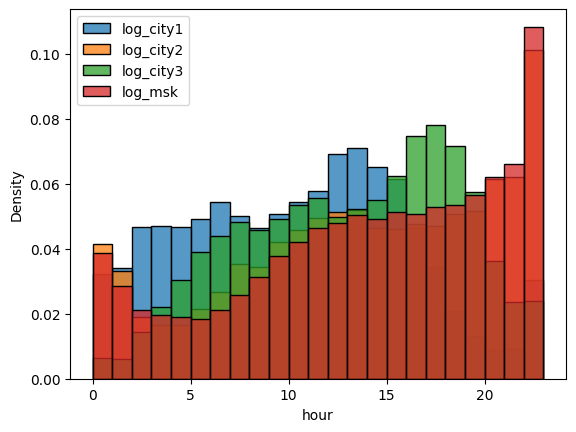

In [12]:
sns.histplot(log_city1['hour'], binwidth=1, stat='density', label='log_city1')
sns.histplot(log_city2['hour'], binwidth=1, stat='density', label='log_city2')
sns.histplot(log_city3['hour'], binwidth=1, stat='density', label='log_city3')
sns.histplot(log_msk['hour'], binwidth=1, stat='density', label='log_msk')

plt.legend()

На графике показаны распределения по городам.

In [13]:
log_city1['hour'].mode(), log_city2['hour'].mode(), log_city3['hour'].mode(), log_msk['hour'].mode()

(0    13
 Name: hour, dtype: int32,
 0    21
 Name: hour, dtype: int32,
 0    17
 Name: hour, dtype: int32,
 0    21
 Name: hour, dtype: int32)